<a href="https://colab.research.google.com/github/harshal2962/-Monte-Carlo-Simulation/blob/main/walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
features = pd.read_csv('raw_features.csv')
features.shape
features.head()

(8190, 12)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [ ]:
stores = pd.read_csv('raw_stores.csv')
stores.head()
new_features = features.merge(stores, how='inner', on='Store')
new_features.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


(421570, 5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


count     421570
unique        81
top            1
freq        6435
Name: Dept, dtype: int64

1     6435
10    6435
38    6435
21    6435
67    6435
      ... 
78     235
77     150
65     143
39      16
43      12
Name: Dept, Length: 81, dtype: int64

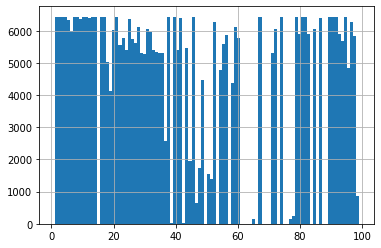

In [ ]:
train1 = pd.read_csv('raw_train.csv')
train1.shape
train1.head()
# train1['Date'] = train_set['Date'].astype('datetime64')
train1.Dept.astype('category').describe()
train1.Dept.value_counts()
train1.Dept.hist(bins=100)

**Training Set**

In [ ]:
train_set = train1.merge(new_features,
                           how='inner',
                           on=['Store','Date','IsHoliday']).reset_index(drop=True)
train_set['Date'] = train_set['Date'].astype('datetime64')
train_set['Year'] = train_set['Date'].dt.year
train_set['Month'] = train_set['Date'].dt.month
train_set['Week'] = train_set['Date'].dt.isocalendar().week
train_set['IsHoliday'] = train_set['IsHoliday'].astype('int')
train_set.head()
train_set.shape

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5
1,1,2,2010-02-05,50605.27,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5
2,1,3,2010-02-05,13740.12,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5
3,1,4,2010-02-05,39954.04,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5
4,1,5,2010-02-05,32229.38,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5


(421570, 19)

In [ ]:
# percentage_missing_values
round(train_set.isnull().sum()*100/ len(train_set),2)

Store            0.00
Dept             0.00
Date             0.00
Weekly_Sales     0.00
IsHoliday        0.00
Temperature      0.00
Fuel_Price       0.00
MarkDown1       64.26
MarkDown2       73.61
MarkDown3       67.48
MarkDown4       67.98
MarkDown5       64.08
CPI              0.00
Unemployment     0.00
Type             0.00
Size             0.00
Year             0.00
Month            0.00
Week             0.00
dtype: float64

We create a new dataset out of the training dataset that is devoid of department data. We have aggregrated that data on stores and corresponding sales date to make EDA interpretable.

In [ ]:
train = train_set.groupby(['Store', 'Date']).agg({'Temperature':'mean',
                                          'Fuel_Price':'mean', 'CPI':'mean',
                                          'Unemployment':'mean',
                                          'Weekly_Sales':'sum','MarkDown1':
                                          'mean','MarkDown2':'mean','MarkDown3'
                                          :'mean','MarkDown4':'mean','MarkDown5'
                                          :'mean','IsHoliday':'mean'}).reset_index()

train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Week'] = train['Date'].dt.isocalendar().week
train = train.merge(stores, how='inner', on='Store')
train

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,Year,Month,Week,Type,Size
0,1,2010-02-05,42.31,2.572,211.096358,8.106,1643690.90,NaN,NaN,NaN,NaN,NaN,0,2010,2,5,A,151315
1,1,2010-02-12,38.51,2.548,211.242170,8.106,1641957.44,NaN,NaN,NaN,NaN,NaN,1,2010,2,6,A,151315
2,1,2010-02-19,39.93,2.514,211.289143,8.106,1611968.17,NaN,NaN,NaN,NaN,NaN,0,2010,2,7,A,151315
3,1,2010-02-26,46.63,2.561,211.319643,8.106,1409727.59,NaN,NaN,NaN,NaN,NaN,0,2010,2,8,A,151315
4,1,2010-03-05,46.50,2.625,211.350143,8.106,1554806.68,NaN,NaN,NaN,NaN,NaN,0,2010,3,9,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,64.88,3.997,192.013558,8.684,713173.95,4556.61,20.64,1.50,1601.01,3288.25,0,2012,9,39,B,118221
6431,45,2012-10-05,64.89,3.985,192.170411,8.667,733455.07,5046.74,NaN,18.82,2253.43,2340.01,0,2012,10,40,B,118221
6432,45,2012-10-12,54.47,4.000,192.327265,8.667,734464.36,1956.28,NaN,7.89,599.32,3990.54,0,2012,10,41,B,118221
6433,45,2012-10-19,56.47,3.969,192.330854,8.667,718125.53,2004.02,NaN,3.18,437.73,1537.49,0,2012,10,42,B,118221


In [ ]:
train.Weekly_Sales.mean(), train_set.Weekly_Sales.mean()

(1046964.8775617732, 15981.258123467327)

Every date is a Friday.

**Test Set**

In [ ]:
test = pd.read_csv('test.csv')
test.shape
test['IsHoliday'] = test['IsHoliday'].astype('int')
test['Date'] = test['Date'].astype('datetime64')
test['Month'] = test['Date'].dt.month
test['Year'] = test['Date'].dt.year
test['Week'] = test['Date'].dt.isocalendar().week
test

(115064, 4)

,Store,Dept,Date,IsHoliday,Month,Year,Week
0,1,1,2012-11-02,0,11,2012,44
1,1,1,2012-11-09,0,11,2012,45
2,1,1,2012-11-16,0,11,2012,46
3,1,1,2012-11-23,1,11,2012,47
4,1,1,2012-11-30,0,11,2012,48
...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,0,6,2013,26
115060,45,98,2013-07-05,0,7,2013,27
115061,45,98,2013-07-12,0,7,2013,28
115062,45,98,2013-07-19,0,7,2013,29


**Store size, type and sales**

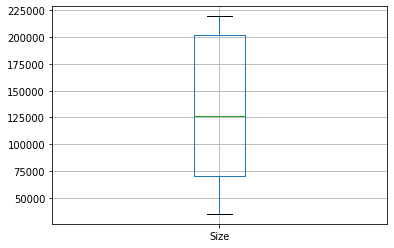

In [ ]:
stores.boxplot(column = ['Size'])

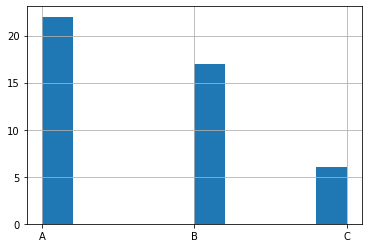

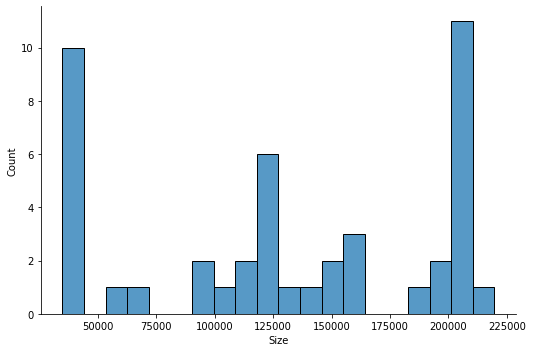

In [ ]:
stores.Type.astype('category').describe()
stores.Type.hist()
stores.Type.value_counts()
sns.displot(stores.Size, bins=20, aspect=1.5);

We have 45 stores in the dataset.
Three store types- A (22) > B (17) > C (6) (store type presence)

In [ ]:
# store_wise_sales = train.groupby(['Store', 'Type','Size'])[['Weekly_Sales']].mean().reset_index()
# store_wise_sales.shape
# store_wise_sales.plot(y='Type', x='Size', kind='scatter')
# sns.displot(store_wise_sales, x="Size", y="Weekly_Sales", hue="Type", height=8)
# store_wise_sales.plot(y='Weekly_Sales', x='Size', kind='scatter')

(45, 4)

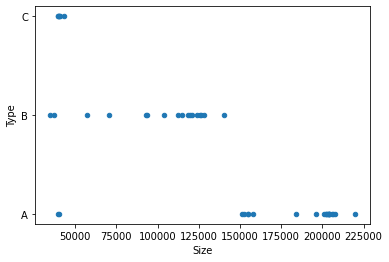

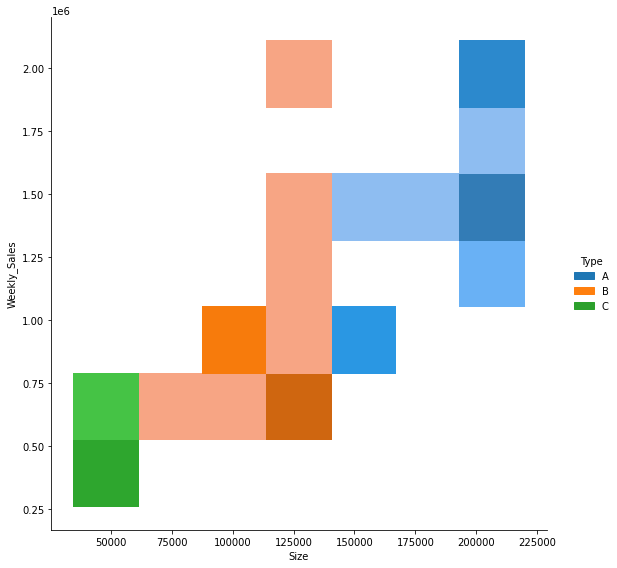

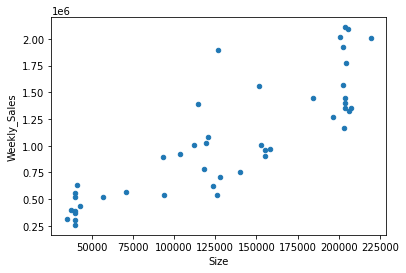

In [ ]:
store_wise_sales = train.groupby(['Store','Type','Size'])[['Weekly_Sales']].mean().reset_index()
store_wise_sales.shape
store_wise_sales.plot(y='Type', x='Size', kind='scatter')
sns.displot(store_wise_sales, x="Size", y="Weekly_Sales", hue="Type", height=8)
store_wise_sales.plot(y='Weekly_Sales', x='Size', kind='scatter')

Type A stores have the highest numbers, largest average size, highest average weekly sales. With Type B and Type C stores we see this trend decreasing respectively.

Conversion of 'Type' as a categorical variable should be into an ordinal or nominal one?
Size, type and sales depict positive linear correlation.

If nominal then one hot encoding or dummies?

In [ ]:
# Type_dummies = pd.get_dummies(data=train.Type,drop_first=True, prefix='Type')
# train.join(Type_dummies, how='left').head()

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder as oe

# oe = OrdinalEncoder()
# # train[['Type']] = oe.fit_transform(train[['Type']])
# encoder= ce.OrdinalEncoder(cols=['Type'],return_df=True, mapping=[{'col':'Type',
#                                                  'mapping':{'A':3,'B':2,'C':1}}])
train.Type = train.Type.apply(lambda x: 3 if x == 'A' else(2 if x == 'B' else 1))
train.Type.unique()

array([3, 2, 1])

In [ ]:
train_set.Type = train_set.Type.apply(lambda x: 3 if x == 'A' else(2 if x == 'B' else 1))
train_set.Type.unique()

array([3, 2, 1])

In [ ]:
# train9.Type = train9.Type.apply(lambda x: 3 if x == 'A' else(2 if x == 'B' else 1))
# train9.Type.unique()

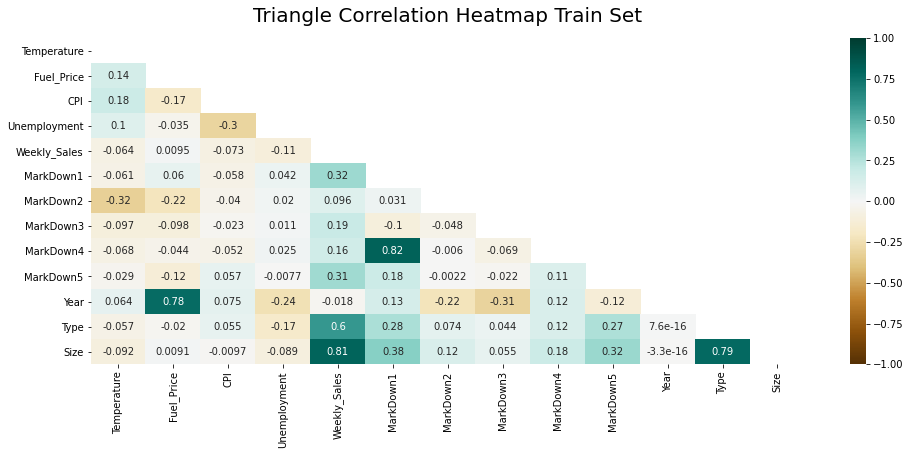

In [ ]:
# pearson correlation heatmap
train4 = train.drop(columns=['Store', 'Date', 'Month','Week', 'IsHoliday'])
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(train4.corr(), dtype=np.bool))
heatmap = sns.heatmap(train4.corr(), mask=mask, vmin=-1, vmax=1, annot=True,
                      cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap Training Set', fontdict={'fontsize':20},
                  pad=16);

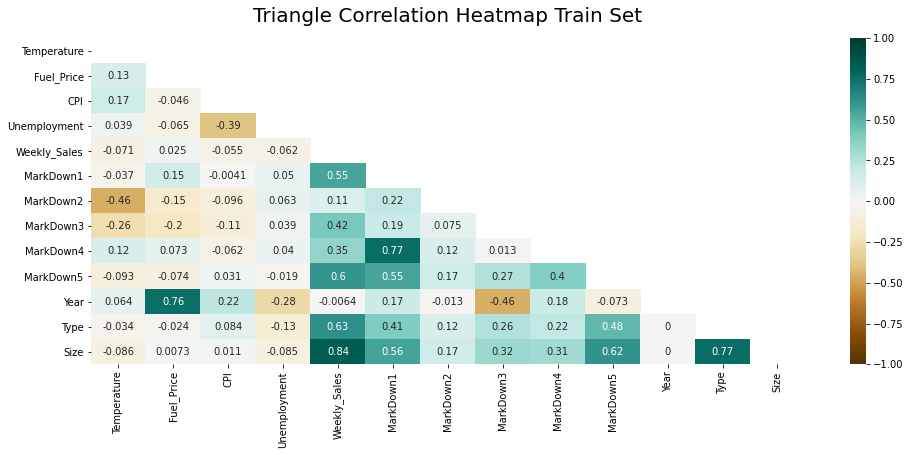

In [ ]:
# Spearman correlation heatmap
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(train4.corr(method='spearman'), dtype=np.bool))
heatmap = sns.heatmap(train4.corr(method='spearman'), mask=mask, vmin=-1, vmax=1, annot=True,
                      cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap Train Set', fontdict={'fontsize':20},
                  pad=16);

High positive linear correlation-

1.   type & size
2.   year & fuel price
3.   MarkDown 1 & 4



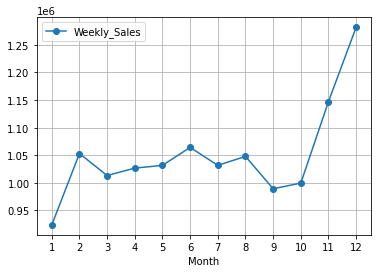

In [ ]:
# Monthly sales trend
Monthly_sales = train.groupby(['Month']).agg({'Weekly_Sales':'mean'}).reset_index()
Monthly_sales.plot(x='Month', y='Weekly_Sales', kind='line', style='o-', xticks = Monthly_sales.Month, grid = True);

June, November and December depict high sales in an ascending manner. January accounts for the lowest sales.

**Holidays**

In [ ]:
aa = train[['Date','Week','Month','IsHoliday']]
aa[train.IsHoliday == 1].value_counts()
import datetime
[datetime.date(2010,12,25).weekday(), datetime.date(2011,12,25).weekday()]

Date        Week  Month  IsHoliday
2012-09-07  36    9      1            45
2012-02-10  6     2      1            45
2011-12-30  52    12     1            45
2011-11-25  47    11     1            45
2011-09-09  36    9      1            45
2011-02-11  6     2      1            45
2010-12-31  52    12     1            45
2010-11-26  47    11     1            45
2010-09-10  36    9      1            45
2010-02-12  6     2      1            45
dtype: int64

[5, 6]

In [ ]:
bb = test[['Date','Week','Month','IsHoliday']]
bb[test.IsHoliday == 1].value_counts()
import datetime
[datetime.date(2012,12,25).weekday()]

Date        Week  Month  IsHoliday
2012-12-28  52    12     1            2988
2012-11-23  47    11     1            2976
2013-02-08  6     2      1            2964
dtype: int64

[1]

Holidays present in


---


Training data:

1.   Super Bowl week 6: 12-Feb-10, 11-Feb-11, 10-Feb-12 > Played on the first Sunday in February
2.   Labor Day week 36: 10-Sep-10, 9-Sep-11, 7-Sep-12 > Celebrated on the first Monday in September
3.   Thanksgiving week 47: 26-Nov-10, 25-Nov-11 > Celebrated on the fourth Thursday of November
4.   Christmas week 52: 31-Dec-10, 30-Dec-11 > Observed on December 25


---


Test data:
1.   Super Bowl week 6: 08-Feb-13 > Played on the first Sunday in February
2.   Thanksgiving week 47: 23-Nov-12 > Celebrated on the fourth Thursday of November
3.   Christmas week 52: 28-Dec-12 > Observed on December 25

Training set =

*  25-Dec-10( week 52): Saturday- no preholiday days
*  25-Dec-11(week 52): Sunday-1 preholiday  day (24-Dec-2011 week 51)

Test Set

*   25-Dec-12(week 52): Monday- 2 preholiday days (24-Dec-2012 week 52, 23-Dec-2012 week 51)







In [ ]:
weekly_sales = train.groupby(['Week','IsHoliday']).agg({'Temperature':'mean',
                                                        'Fuel_Price':'mean',
                                                        'CPI':'mean',
                                                        'Unemployment':'mean',
                                                        'Weekly_Sales':'mean' }).reset_index()

weekly_sales['IsHoliday'] = weekly_sales['IsHoliday'].apply(lambda x: x*9.7e+05)
weekly_sales.tail()
# plotting weekly_sales and holiday presence
# ax = weekly_sales.plot(x='Week', y='Weekly_Sales', kind='line',
#                       style='o-', ylim=(0.8e+6,1.85e+06))
# weekly_sales.plot(x='Week', y='IsHoliday', figsize=(18,6), kind='bar',
#                   xticks= weekly_sales.Week, ax=ax, width=0.4, grid= True)

,Week,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
47,48,0.0,43.756444,3.141656,170.997876,8.139756,1.103329e+06
48,49,0.0,38.687111,3.169067,171.020170,8.139756,1.235866e+06
49,50,0.0,40.708667,3.169533,171.079407,8.139756,1.354517e+06
50,51,0.0,40.394556,3.156656,171.168254,8.139756,1.754774e+06
51,52,970000.0,37.354444,3.159644,171.257101,8.139756,9.608331e+05


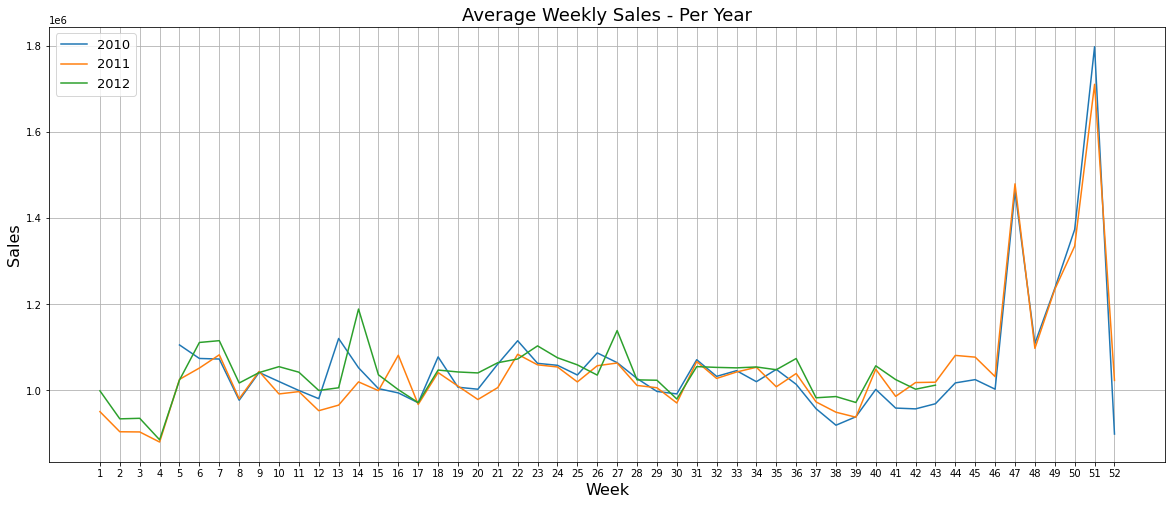

In [ ]:
weekly_sales_2010 = train[train.Year==2010]['Weekly_Sales'].groupby(train['Week']).mean()
weekly_sales_2011 = train[train.Year==2011]['Weekly_Sales'].groupby(train['Week']).mean()
weekly_sales_2012 = train[train.Year==2012]['Weekly_Sales'].groupby(train['Week']).mean()
plt.figure(figsize=(20,8))
sns.lineplot(x=weekly_sales_2010.index, y=weekly_sales_2010.values)
sns.lineplot(x=weekly_sales_2011.index, y=weekly_sales_2011.values)
sns.lineplot(x=weekly_sales_2012.index, y=weekly_sales_2012.values)
# sns.scatterplot(x=weekly_sales.Week, y=weekly_sales.IsHoliday)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=13)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show();

Create flags for January month, week 47 and 51

**Temperature**

In [ ]:
train['Temperature'].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

count    6435.000000
mean       60.663782
std        18.444933
min        -2.060000
1%         18.523600
10%        34.560000
25%        47.460000
50%        62.670000
75%        74.940000
90%        83.992000
99%        93.190000
max       100.140000
Name: Temperature, dtype: float64

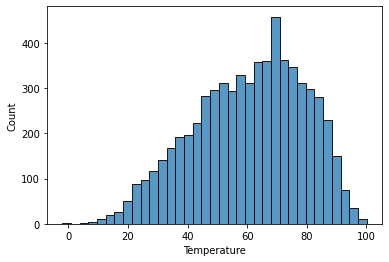

In [ ]:
sns.histplot(train.Temperature)

Data is skewed towards lower temperature values.

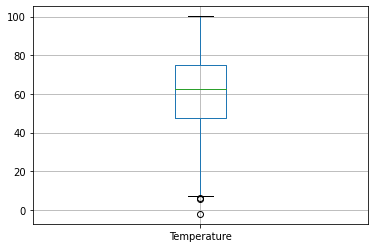

In [ ]:
train.boxplot(column = ['Temperature'])

In terms of Temperature(Farehnheit) the historical variation for a week of the store under observation is not high. Thus, outliers for temperatures will be ignored for now.

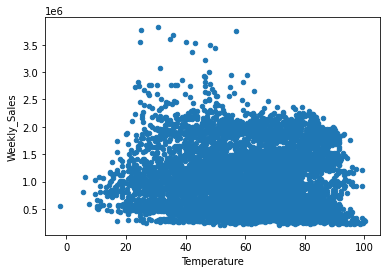

In [ ]:
train.plot(x='Temperature', y='Weekly_Sales', kind='scatter')

We'll bin the temperature data to make sense of the scatterplot

In [ ]:
tt = train.copy()
tt['Temperature'] = pd.cut(tt['Temperature'], bins = [tt.Temperature.min(),10,20,
                                                      30,40,50,60,70,80,90,tt.Temperature.max()], labels= [10,20,30,40,50,60,70,80,90,100])

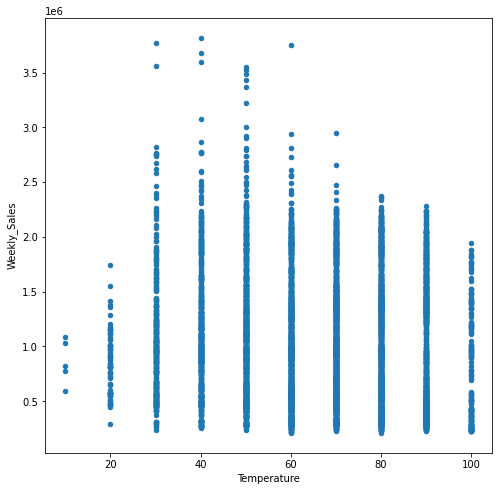

In [ ]:
tt.plot(x='Temperature', y='Weekly_Sales', kind='scatter', figsize=(8,8))

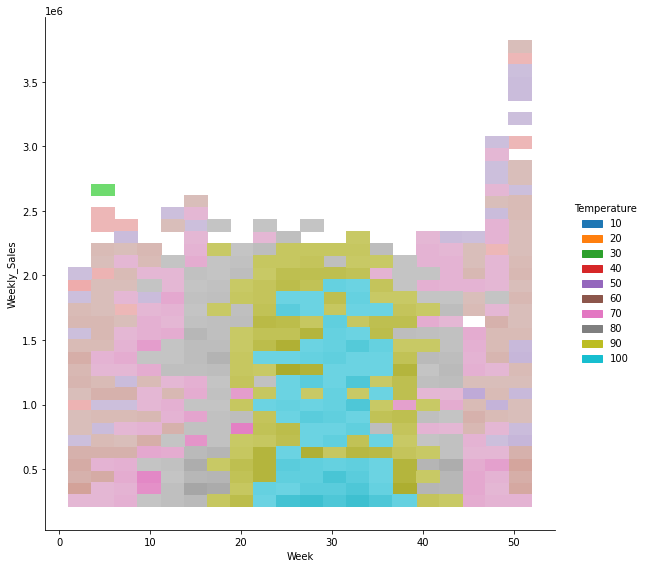

In [ ]:
sns.displot(tt, x="Week", y="Weekly_Sales", hue="Temperature", height=8)

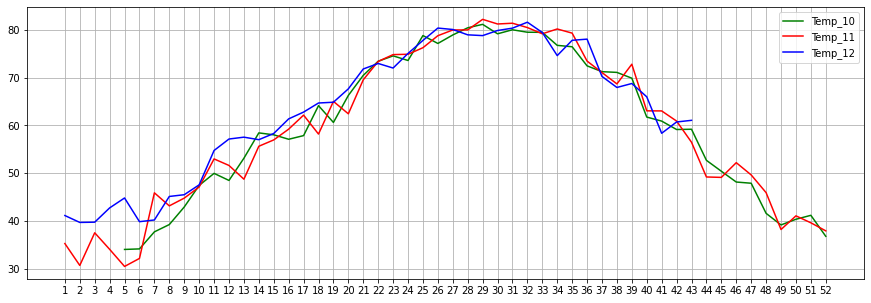

In [ ]:
Temp_10 = train[train.Year == 2010].groupby(['Week']).agg({'Temperature': 'mean'}).reset_index()

Temp_11 = train[train.Year == 2011].groupby(['Week']).agg({'Weekly_Sales' : 'mean',
                                         'Temperature': 'mean'}).reset_index()

Temp_12 = train[train.Year == 2012].groupby(['Week']).agg({'Weekly_Sales' : 'mean',
                                         'Temperature': 'mean'}).reset_index()
fig, ax = plt.subplots(figsize = (15,5))

ax.plot(Temp_10.Week, Temp_10.Temperature, color = 'green', label = 'Temp_10', )
ax.plot(Temp_11.Week, Temp_11.Temperature, color = 'red', label = 'Temp_11')
ax.plot(Temp_12.Week, Temp_12.Temperature, color = 'blue', label = 'Temp_12')
ax.set_xticks(Temp_11.Week)
ax.legend(loc = 'best')
ax.grid()
plt.show();

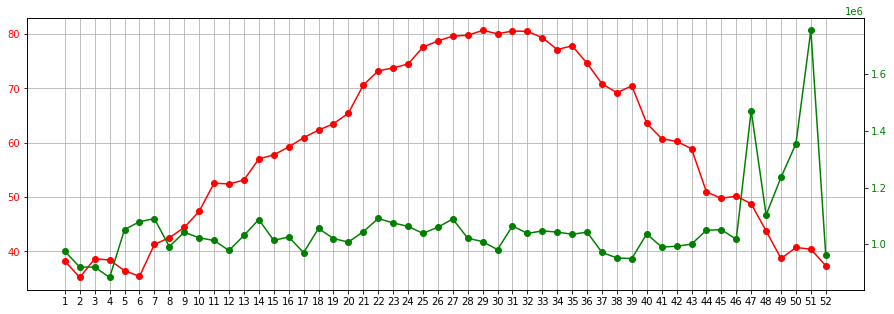

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(weekly_sales.Week, weekly_sales.Temperature, color='red', marker='o')
ax.tick_params(axis='y', labelcolor='red')
ax.set_xticks(weekly_sales.Week)
ax.grid()
ax2 = ax.twinx()

ax2.plot(weekly_sales.Week, weekly_sales.Weekly_Sales, color='green',marker='o')
ax2.tick_params(axis='y', labelcolor='green')

plt.show();

**Fuel**

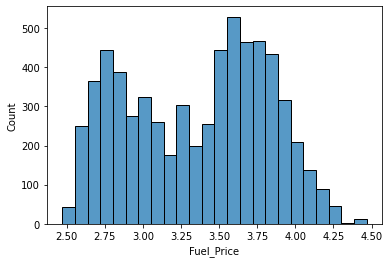

In [ ]:
sns.histplot(train.Fuel_Price)

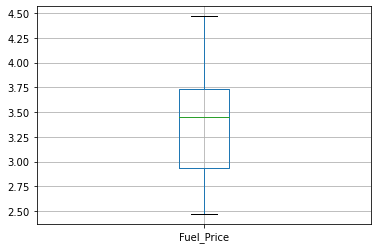

In [ ]:
train_set.boxplot(column = ['Fuel_Price'])

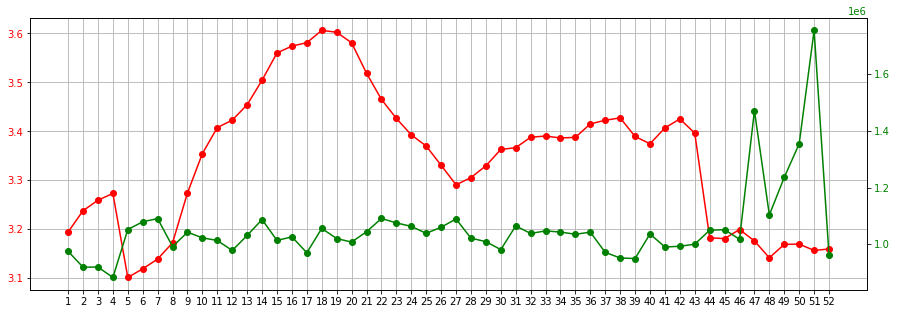

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(weekly_sales.Week, weekly_sales.Fuel_Price, color='red', marker='o')
ax.tick_params(axis='y', labelcolor='red')
ax.set_xticks(weekly_sales.Week)
ax.grid()
ax2 = ax.twinx()

ax2.plot(weekly_sales.Week, weekly_sales.Weekly_Sales, color='green',marker='o')
ax2.tick_params(axis='y', labelcolor='green')

plt.show();

**CPI**

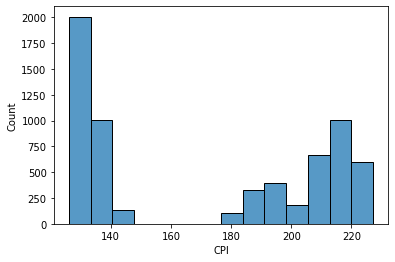

In [ ]:
sns.histplot(train.CPI)

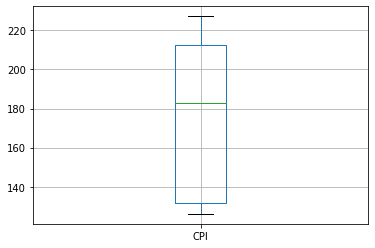

In [ ]:
train.boxplot(column = ['CPI'])

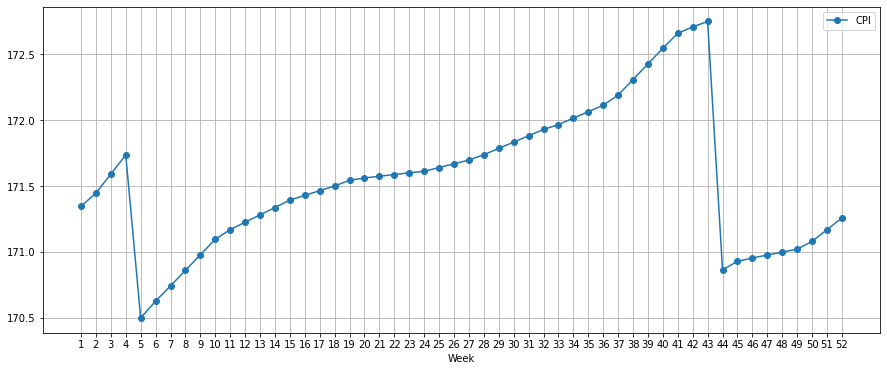

In [ ]:
cpi = train.groupby(['Week']).agg({'CPI' : 'mean'}).reset_index()
cpi.plot(x = 'Week', y = 'CPI', kind='line', xticks = cpi.Week, figsize=(15,6), style='o-', grid=True)

**Unemployment**

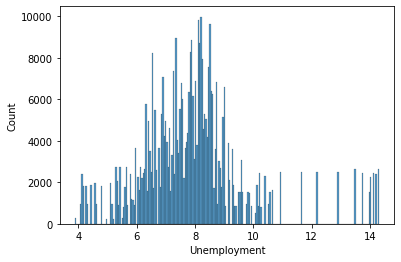

In [ ]:
sns.histplot(train_set.Unemployment)

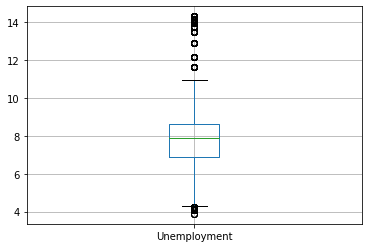

In [ ]:
train.boxplot(column = ['Unemployment'])

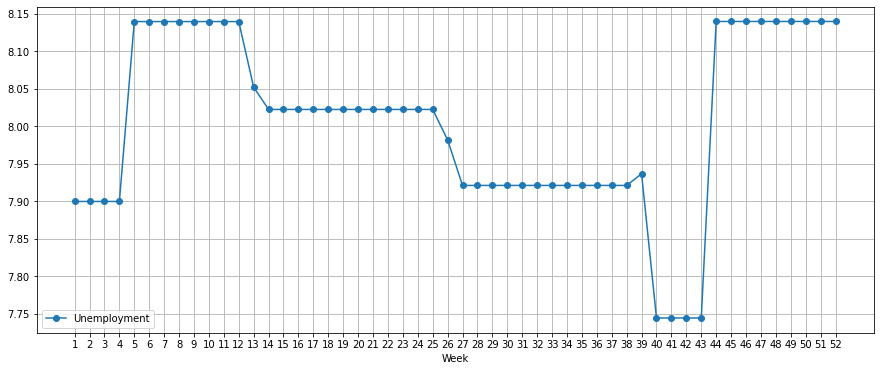

In [ ]:
ue = train.groupby(['Week']).agg({'Unemployment' : 'mean'}).reset_index()
ue.plot(x = 'Week', y = 'Unemployment', kind='line', xticks = ue.Week, figsize=(15,6), style='o-', grid=True)

**Markdown**

MarkDown data is availabe from November 2011 till October 2012.

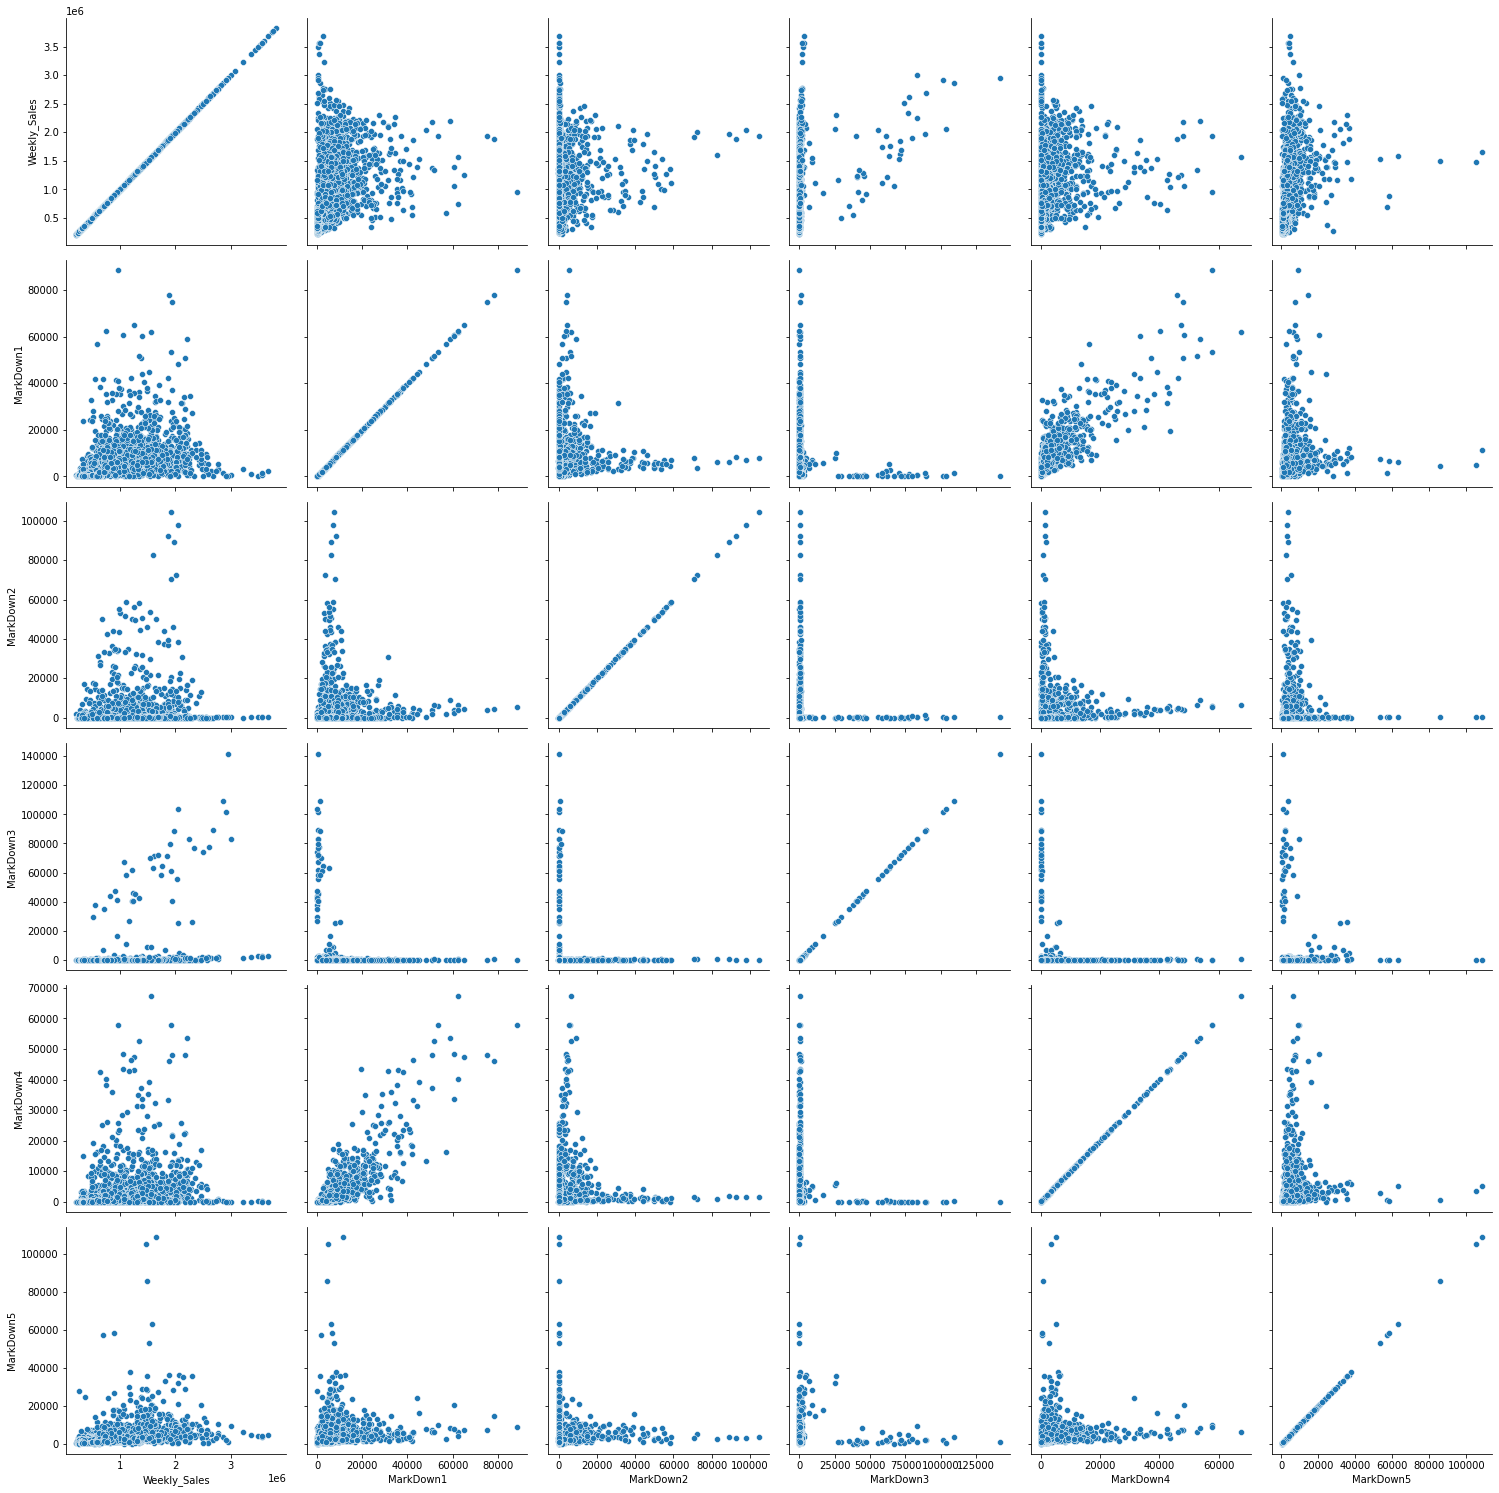

In [ ]:
cols = ['Weekly_Sales','MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
g = sns.PairGrid(train[cols], height=3.5, dropna=True)
g.map(sns.scatterplot)

MarkDown 1 and 4 have positive linear correlation. Weekly sales seems linearly uncorrelated. Other relationships are hyperbolic/ binary in nature.

In [ ]:
train_set.fillna(0, inplace=True)

In [ ]:
# Replacing missing values in Markdown with 0
train.fillna(0, inplace=True)
train.isnull().sum()
train.head()

Store           0
Date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Weekly_Sales    0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
IsHoliday       0
Year            0
Month           0
Week            0
Type            0
Size            0
dtype: int64

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,Year,Month,Week,Type,Size
0,1,2010-02-05,42.31,2.572,211.096358,8.106,1643690.90,0.0,0.0,0.0,0.0,0.0,0,2010,2,5,3,151315
1,1,2010-02-12,38.51,2.548,211.242170,8.106,1641957.44,0.0,0.0,0.0,0.0,0.0,1,2010,2,6,3,151315
2,1,2010-02-19,39.93,2.514,211.289143,8.106,1611968.17,0.0,0.0,0.0,0.0,0.0,0,2010,2,7,3,151315
3,1,2010-02-26,46.63,2.561,211.319643,8.106,1409727.59,0.0,0.0,0.0,0.0,0.0,0,2010,2,8,3,151315
4,1,2010-03-05,46.50,2.625,211.350143,8.106,1554806.68,0.0,0.0,0.0,0.0,0.0,0,2010,3,9,3,151315


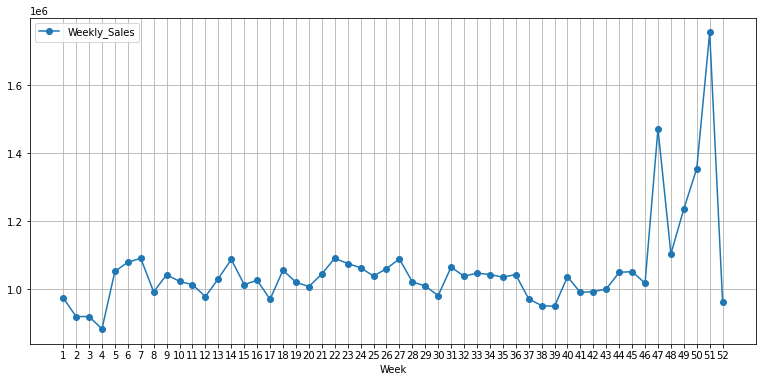

In [ ]:
dd = train.groupby(['Week']).agg({'Weekly_Sales' : 'mean', 'MarkDown1': 'mean',
                          'MarkDown2': 'mean', 'MarkDown3': 'mean',
                          'MarkDown4': 'mean', 'MarkDown5': 'mean'}).reset_index()
# dd.dropna(inplace=True)

dd.plot(x = 'Week', y = 'Weekly_Sales', kind='line', xticks = dd.Week, figsize=(13,6), style='o-', grid=True)

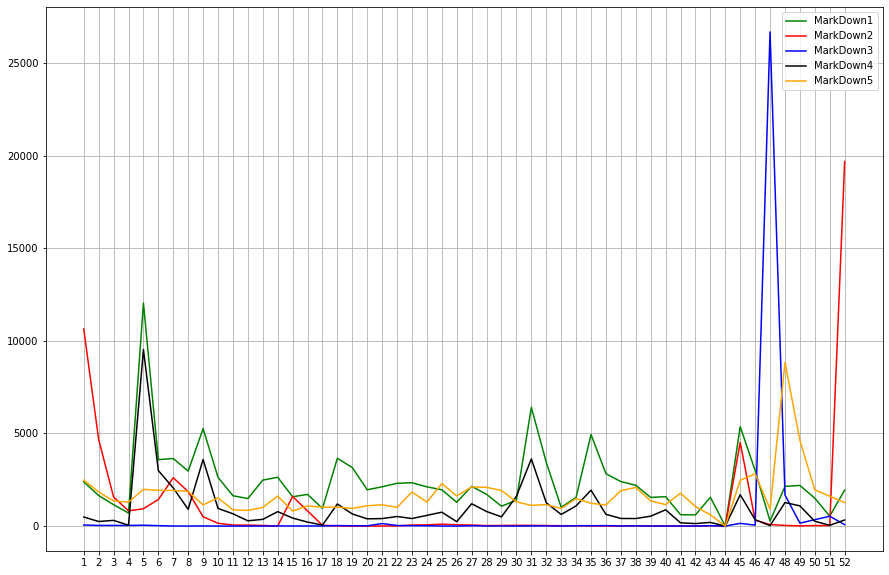

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))

ax.plot(dd.Week, dd.MarkDown1, color = 'green', label = 'MarkDown1', )
ax.plot(dd.Week, dd.MarkDown2, color = 'red', label = 'MarkDown2')
ax.plot(dd.Week, dd.MarkDown3, color = 'blue', label = 'MarkDown3')
ax.plot(dd.Week, dd.MarkDown4, color = 'black', label = 'MarkDown4')
ax.plot(dd.Week, dd.MarkDown5, color = 'orange', label = 'MarkDown5')
ax.set_xticks(dd.Week)
ax.legend(loc = 'best')
ax.grid()
plt.show();

Multicollinearity

In [ ]:
train00 = train[['Type', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment']].dropna()
train00.astype('float64')

,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,3.0,151315.0,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106
1,3.0,151315.0,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106
2,3.0,151315.0,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106
3,3.0,151315.0,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106
4,3.0,151315.0,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...
6430,2.0,118221.0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
6431,2.0,118221.0,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170411,8.667
6432,2.0,118221.0,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667
6433,2.0,118221.0,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = train00.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(train00.values, i)
                          for i in range(len(train00.columns))]

print(vif_data)

         feature        VIF
0           Type  30.336352
1           Size  14.247014
2    Temperature  13.678257
3     Fuel_Price  32.218472
4      MarkDown1   4.694899
5      MarkDown2   1.105342
6      MarkDown3   1.015194
7      MarkDown4   3.720786
8      MarkDown5   1.443818
9            CPI  16.249868
10  Unemployment  15.773681


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def WMAE(dataset, real_target_variable, predicted_target_variable):
    weights = dataset.IsHoliday.apply(lambda x: 5 if x else 1)
    wmae = np.round(np.sum(weights*abs(real_target_variable -
                             predicted_target_variable))/(np.sum(weights)), 3)
    return wmae

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train = train_set[['Store','Dept','IsHoliday','Size','Week','Year']]
Y_train = train_set['Weekly_Sales']
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
predicted = RF.predict(x_test)
WMAE(x_test, y_test, predicted)

In [ ]:
# from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator = RF, X = x_train, y = y_train, cv =10)
# print("Accuracy: {:2f} %". format(accuracies.mean()*100))
# print("Standard Deviation: {:2f} %". format(accuracies.std()*100))

In [ ]:
# from sklearn.model_selection import GridSearchCV
# parameters = [{ }]
# grid_search = GridSearchCV(estimator = RF, param_grid = parameters,
#                            scoring = 'accuracy', cv = 8, n_jobs = -1 )
# grid_search.fit(x_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_

In [ ]:
# from sklearn.svm import SVR
# regressor = SVR(kernel = 'rbf')
# regressor.fit(x_train, y_train)
# predicted = regressor.predict(x_test)
# WMAE(x_test, y_test, predicted)

In [ ]:
# train_set.dtypes
# train.Week.astype('int64')

In [ ]:
# import xgboost as xgb
# xgbr = xgb.XGBRegressor(verbosity=0)
# xgbr.fit(x_train, y_train)
# predicted = xgbr.predict(x_test)
# WMAE(x_test, y_test, predicted)

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# X_train = train_set[['Store','Dept','IsHoliday','Size','Week','Year','Temperature']]
# Y_train = train_set['Weekly_Sales']
# x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)
# RF = RandomForestRegressor()
# RF.fit(x_train, y_train)
# predicted = RF.predict(x_test)
# WMAE(x_test, y_test, predicted)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train = train_set[['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Year','Week']]
Y_train = train_set['Weekly_Sales']
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
predicted = RF.predict(x_test)
WMAE(x_test, y_test, predicted)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

4.909

In [ ]:
import pickle
with open('file', 'wb') as f:
  pickle.dump(lr_clf, f)

In [ ]:
import json
columns = {}